<a href="https://colab.research.google.com/github/Untick/Marketplaces/blob/Romanov-Sergey-branch/Romanov%20Sergey/%E2%99%AB%E2%99%AB%E2%99%AB_20_08_2023_%7C_%D0%A0%D0%B0%D0%B1%D0%BE%D1%87%D0%B0%D1%8F_%D1%82%D0%B5%D1%82%D1%80%D0%B0%D0%B4%D1%8C_%7C_%D0%A0%D0%BE%D0%BC%D0%B0%D0%BD%D0%BE%D0%B2_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B9_%7C_%D0%9C%D0%90%D0%A0%D0%9A%D0%95%D0%A2%D0%9F%D0%9B%D0%AD%D0%99%D0%A1%D0%AB_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

►►► Задание:
Задача регрессии. Предсказываем только оборот категории в маркетплейсе. Колонки из файла метрики.

In [2]:
### Ячейка для библиотек
import numpy as np #Библиотека работы с массивами
import pandas as pd # Библиотека для работы с базами

#from tensorflow.keras.models import Sequential, Model #
#from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten #
#from tensorflow.keras import utils #Используем для to_categoricall
#from tensorflow.keras.optimizers import Adam,Adadelta,SGD,Adagrad,RMSprop #
#from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence #
#from tensorflow.keras.preprocessing.sequence import pad_sequences #
#from tensorflow.keras.callbacks import LambdaCallback # подключаем колбэки

from sklearn.preprocessing import StandardScaler #
from sklearn.model_selection import train_test_split # Для разбивки на выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error #
#from google.colab import files #Для загрузки своей картинки

import random #Для генерации случайных чисел
#import math # Для округления
import os #Для работы с файлами
import re #
import matplotlib.pyplot as plt #
%matplotlib inline
import pickle #реализует мощный алгоритм сериализации и десериализации объектов Python, сохранение датафрейма в файл

from IPython.display import clear_output

import glob #для поиска CSV файлов

In [3]:
# Подключаем диск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Подгружаем файлы


In [ ]:
df_grafhics = pd.read_excel('/content/drive/MyDrive/Marketplaces/Graphics_Analytics_01.06.2022-31.05.2023.xlsx')
df_stock = pd.read_excel('/content/drive/MyDrive/Marketplaces/Stock_Analytics_01.06.2022-31.05.2023.xlsx')
#df_rewiews = pd.read_excel('/content/drive/MyDrive/Marketplaces/Reviews.xlsx')

In [ ]:
#df_base = pd.read_csv('/content/drive/MyDrive/Marketplaces/Base.csv', sep=';')

In [ ]:
df_grafhics.insert(5, "Акции", 0) #Добавляем столбец "Акции" в фрейм Графики, перед объединением с фреймом "Акции"

In [ ]:
print(df_grafhics.shape)
print(df_stock.shape)

(254748, 20)
(239957, 20)


#Объединяем ГРАФИКИ и АКЦИИ

Не надо каждый раз всё делать, последняя ячейка в разделе - выгрузка обработанного датафрейма из файла.

In [ ]:
# Проверяем идентичность столбцов
for i in range(df_grafhics.shape[1]):
  print(f'{(df_grafhics.columns[i] == df_stock.columns[i])}, {df_grafhics.columns[i]}, {df_stock.columns[i]}')

In [ ]:
df_grafhics = df_grafhics.drop(columns=['Отменено товаров'])

In [ ]:
df_grafhics = df_grafhics.drop(columns=['Возвращено товаров'])

In [ ]:
df_grafhics = df_grafhics.drop(columns=['Отправления с премиум-подпиской, принятые в обработку'])

In [ ]:
df_stock = df_stock.drop(columns=['Отправления с премиум-подпиской, принятые в обработку'])

In [ ]:
df_stock = df_stock.drop(columns=df_stock.columns[-2])

In [ ]:
df_stock = df_stock.drop(columns='Заказано на сумму по акции')

In [ ]:
# Проверяем идентичность столбцов
for i in range(df_grafhics.shape[1]):
  print(f'{i}, {(df_grafhics.columns[i] == df_stock.columns[i])}, {df_grafhics.columns[i]}, {df_stock.columns[i]}')

0, True, Категория 3-го уровня, Категория 3-го уровня
1, True, Товары, Товары
2, True, Модель, Модель
3, True, Ozon ID, Ozon ID
4, True, Артикул, Артикул
5, True, Акции, Акции
6, True, День, День
7, True, Уникальные посетители, всего, Уникальные посетители, всего
8, True, Уникальные посетители с просмотром карточки товара, Уникальные посетители с просмотром карточки товара
9, True, Показы, всего, Показы, всего
10, True, Показы на карточке товара, Показы на карточке товара
11, True, Показы в поиске и каталоге, Показы в поиске и каталоге
12, True, Позиция в поиске и каталоге, Позиция в поиске и каталоге
13, True, В корзину, всего, В корзину, всего
14, True, Заказано товаров, Заказано товаров
15, True, Доставлено (за выбранный период), Доставлено (за выбранный период)
16, True, Заказано на сумму, Заказано на сумму


In [ ]:
print(df_grafhics.shape)
print(df_stock.shape)

(254748, 17)
(239957, 17)


In [ ]:
df_grafh_stock = pd.concat([df_grafhics, df_stock], ignore_index=True)

In [ ]:
print(df_grafhics.shape)
print(df_stock.shape)
print(df_grafh_stock.shape)

(254748, 17)
(239957, 17)
(494705, 17)


In [ ]:
#  Меняем формат на DateTime
for i in range(df_grafh_stock['День'].shape[0]):
    df_grafh_stock['День'].iloc[i] = np.datetime64(df_grafh_stock['День'].iloc[i])

<ipython-input-30-7028bb43f56c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grafh_stock['День'].iloc[i] = np.datetime64(df_grafh_stock['День'].iloc[i])


In [ ]:
print(df_grafh_stock.loc[0, 'День'])
print(type(df_grafh_stock.loc[0, 'День']))

2023-03-03
<class 'numpy.datetime64'>


In [ ]:
with open('/content/drive/MyDrive/Marketplaces/df_grafh_stock', 'wb') as pickle_out: #Сохранили датафрейм df_grafh_stock в файл
  pickle.dump(df_grafh_stock, pickle_out)


In [5]:
# выгружать датафрейм из файла
with open('/content/drive/MyDrive/Marketplaces/df_grafh_stock', 'rb') as pickle_in:
   df_grafh_stock = pickle.load(pickle_in)

# Подгружаем данные по неделям

In [4]:
def find_csv_to_df(path):
  '''
  function: find_csv_to_df - для поиска всех csv-файлов в указанной дирректории и перевода их в ДатаФреймы из которых формируется список
  input: путь к папке в которой будет проведён поиск csv-файлов
  principle: формируем список из всех путей к паккам в указанной дирректории, начиная с корневой.
             формируем список из имён csv-файлов по каждой папке
             выгружаем каждый csv-файл в ДатаФрейм
             каждый ДатаФрейм добавляем как отдельный элемент результирующего списка
  output: список, каждый элемент которого - ДатаФрейм из отдлеьного csv-файла
  '''
  list_df = []                             # список куда будем добавлять ДатаФреймы из файлов .csv
  list_dir = [x[0] for x in os.walk(path)] # генерируем список с путями ко всем папкам в указанном пути
  for i in list_dir:                       # перебираем пути всех папок
    loc_path = i                           # выполняем не изученную мной абракадабру....
    extension = 'csv'
    os.chdir(loc_path)
    list_csv = glob.glob('*.{}'.format(extension)) # ...,но в итоге получам список с названими всех csv-файлов из конкретной папки
    for j in list_csv:                     # перебираем все csv-файлы и выгружаем их в ДатаФреймы
      df_loc = pd.read_csv(f'{i}/{j}', sep=';')
      list_df.append(df_loc)               # каждый ДатаФрейм добавляем в список
  return list_df

In [5]:
list_datasets = find_csv_to_df('/content/drive/MyDrive/Marketplaces/datasets new/По неделям')

In [6]:
print(len(list_datasets))

75


In [7]:
for i in list_datasets[:3]:
  print(i.shape, type(i), i.columns[:15])

(517, 49) <class 'pandas.core.frame.DataFrame'> Index(['SKU', 'Название', 'Бренд', 'Продавец', 'Категория', 'Схема', 'Наличие',
       'Коммент.', 'Рейтинг', 'Цена', 'Мин. цена', 'Макс. цена', 'Ср . цена',
       'Продаж', 'Выручка (7 дней)'],
      dtype='object')
(535, 49) <class 'pandas.core.frame.DataFrame'> Index(['SKU', 'Название', 'Бренд', 'Продавец', 'Категория', 'Схема', 'Наличие',
       'Коммент.', 'Рейтинг', 'Цена', 'Мин. цена', 'Макс. цена', 'Ср . цена',
       'Продаж', 'Выручка (7 дней)'],
      dtype='object')
(525, 49) <class 'pandas.core.frame.DataFrame'> Index(['SKU', 'Название', 'Бренд', 'Продавец', 'Категория', 'Схема', 'Наличие',
       'Коммент.', 'Рейтинг', 'Цена', 'Мин. цена', 'Макс. цена', 'Ср . цена',
       'Продаж', 'Выручка (7 дней)'],
      dtype='object')


In [8]:
n = 0
for i in df_grafh_stock.columns:
  print(f'{n}  {i}')
  n+=1


0  Категория 3-го уровня
1  Товары
2  Модель
3  Ozon ID
4  Артикул
5  Акции
6  День
7  Уникальные посетители, всего
8  Уникальные посетители с просмотром карточки товара
9  Показы, всего
10  Показы на карточке товара
11  Показы в поиске и каталоге
12  Позиция в поиске и каталоге
13  В корзину, всего
14  Заказано товаров
15  Доставлено (за выбранный период)
16  Заказано на сумму


In [9]:
n = 0
for i in list_datasets[0].columns:
  print(f'{n}  {i}')
  n+=1

0  SKU
1  Название
2  Бренд
3  Продавец
4  Категория
5  Схема
6  Наличие
7  Коммент.
8  Рейтинг
9  Цена
10  Мин. цена
11  Макс. цена
12  Ср . цена
13  Продаж
14  Выручка (7 дней)
15  Средняя дневная выручка
16  Потенциал
17  Упущенная выручка
18  Упущенная выручка %
19  Был в наличии
20  Дней с продажами
21  Среднее при наличии
22  Фото
23  Url
24  Среднее число продаж
25  Позиция в категории
26  Цена до скидки
27  Медиан. цена
28  Продажи 2022-05-02
29  Продажи 2022-05-03
30  Продажи 2022-05-04
31  Продажи 2022-05-05
32  Продажи 2022-05-06
33  Продажи 2022-05-07
34  Продажи 2022-05-08
35  Запросы 2022-05-02
36  Запросы 2022-05-03
37  Запросы 2022-05-04
38  Запросы 2022-05-05
39  Запросы 2022-05-06
40  Запросы 2022-05-07
41  Запросы 2022-05-08
42  Остатки 2022-05-02
43  Остатки 2022-05-03
44  Остатки 2022-05-04
45  Остатки 2022-05-05
46  Остатки 2022-05-06
47  Остатки 2022-05-07
48  Остатки 2022-05-08


In [10]:
list_datasets[0].head()

,SKU,Название,Бренд,Продавец,Категория,Схема,Наличие,Коммент.,Рейтинг,Цена,...,Запросы 2022-05-06,Запросы 2022-05-07,Запросы 2022-05-08,Остатки 2022-05-02,Остатки 2022-05-03,Остатки 2022-05-04,Остатки 2022-05-05,Остатки 2022-05-06,Остатки 2022-05-07,Остатки 2022-05-08
0,510662756,Светодиодные линзы Aozoom A3+ Global (комплект),Aozoom,ГАЛОГЕНУ NET,Автотовары/Автозапчасти/Автосвет/Комплектующие...,FBS,31,0,0,10500,...,33,36,39,39,39,31,31,31,31,31
1,556497014,Бигалогенная линза GNX Hella 3R H7 (2шт),GNX,ГАЛОГЕНУ NET,Автотовары/Автозапчасти/Автосвет/Комплектующие...,FBS,131,0,0,4200,...,44,47,48,144,144,130,131,131,131,131
2,480448445,Линзы для фар GNX Hella 3R H7,GNX,ГАЛОГЕНУ NET,Автотовары/Автозапчасти/Автосвет/Фары,FBS,263,6,"4,67",2100,...,86,103,127,287,287,261,263,263,263,263
3,472486313,Светодиодные линзы Aozoom Dragon Knight K3 V2 ...,Aozoom,ГАЛОГЕНУ NET,Автотовары/Автозапчасти/Автосвет/Фары,FBS,19,1,5,16900,...,23,19,16,22,22,21,19,19,19,19
4,511572616,Стекло фары Mercedes GL X164 2006-2012 (правое),GNX,ГАЛОГЕНУ NET,NaN,FBS,14,0,0,12000,...,0,0,0,16,16,16,14,14,14,14


In [11]:
df_grafh_stock[df_grafh_stock['Товары'] == 'Бигалогенная линза GNX Hella 3R H7 (2шт)'].shape #поиск

(736, 17)

Данные для предсказания - некоторые столбцы из фреймов метрики.  
Результат предсказания - столбец заказанно на сумму из объединённого фрейма графики+акции

In [12]:
# делаем дубликат из которого будем убирать не нужное
list_datasets_1 = list_datasets

In [ ]:
# удаление столбцов()
#for i in list_datasets:
#  n = i.drop(i.columns[28:], axis=1)
#  list_datasets_1.append(n)

In [13]:
# в имени столбцов убираем слово "остатки", оставляем только даты, чтобы потом легко менять их в дататайм - формат
for j in range(len(list_datasets_1)):
  for i in list_datasets_1[j].columns[42:]:
    list_datasets_1[j].rename(columns = {i:i[-10:]}, inplace = True )



In [14]:
#проверяем, что везде исправленно корректно
for i in range(len(list_datasets_1)):
  print(list_datasets_1[i].columns[42:])

Index(['2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06',
       '2022-05-07', '2022-05-08'],
      dtype='object')
Index(['2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13',
       '2022-05-14', '2022-05-15'],
      dtype='object')
Index(['2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20',
       '2022-05-21', '2022-05-22'],
      dtype='object')
Index(['2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26', '2022-05-27',
       '2022-05-28', '2022-05-29'],
      dtype='object')
Index(['2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02', '2022-06-03',
       '2022-06-04', '2022-06-05'],
      dtype='object')
Index(['2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10',
       '2022-06-11', '2022-06-12'],
      dtype='object')
Index(['2022-06-13', '2022-06-14', '2022-06-15', '2022-06-16', '2022-06-17',
       '2022-06-18', '2022-06-19'],
      dtype='object')
Index(['2022-06-20', '2022-06-21', '2022-06-22', '2022-

In [15]:
data1 = df_grafh_stock.loc[:,['Товары', 'Заказано на сумму', 'День']].values

In [9]:
#создаём ДатаФрейм с данными для нейросети
df_train = pd.DataFrame(df_grafh_stock.loc[:,['Товары', 'Заказано на сумму', 'День']].values, columns = ['Товары', 'Заказано на сумму', 'День'], index = range(df_grafh_stock.loc[:,['Товары']].shape[0]))

In [10]:
df_train.shape # размерность полного датафрейма

(494705, 3)

In [13]:
df_train.head()

,Товары,Заказано на сумму,День
0,Светодиодная подсветка салона,0,2023-03-03
1,Светодиодная подсветка салона,0,2023-03-05
2,Светодиодная подсветка салона,0,2023-03-05
3,Светодиодная подсветка салона,0,2023-03-06
4,Светодиодная подсветка салона,0,2023-03-07


In [12]:
 df_train_no_null = df_train[ df_train['Заказано на сумму'] != 0] # дублирующий фрейм без нулевых значений

In [14]:
 df_train_no_null.shape # Размерность датафрейма без нулевых значений(так как параметры в  дни с нулевыми заказами нас не интересуют)

(13825, 3)

In [15]:
 df_train_no_null.head()

,Товары,Заказано на сумму,День
102,Светодиодные линзы Aozoom A3+ RU (комплект),10900,2022-06-06
117,Светодиодные линзы Aozoom A3+ RU (комплект),10900,2022-06-21
123,Светодиодные линзы Aozoom A3+ RU (комплект),9980,2022-06-27
124,Светодиодные линзы Aozoom A3+ RU (комплект),9980,2022-06-28
139,Светодиодные линзы Aozoom A3+ RU (комплект),9980,2022-07-13


In [22]:
df_0 = list_datasets_1[0].iloc[:,[1, 8, 9, 10, 11, 12, 19, 20, 21, 25, 26, 27]] # выбираем столбцы - параметры, на которые в будущем можем регулировать

In [23]:
df_0.head()

,Название,Рейтинг,Цена,Мин. цена,Макс. цена,Ср . цена,Был в наличии,Дней с продажами,Среднее при наличии,Позиция в категории,Цена до скидки,Медиан. цена
0,Светодиодные линзы Aozoom A3+ Global (комплект),0,10500,10500,10500,10500.0,7,1,"1,1429",-1,14700,10500
1,Бигалогенная линза GNX Hella 3R H7 (2шт),0,4200,4200,4200,4200.0,7,1,2,10,5500,4200
2,Линзы для фар GNX Hella 3R H7,"4,67",2100,2100,2100,2100.0,7,1,"3,7143",56,2800,2100
3,Светодиодные линзы Aozoom Dragon Knight K3 V2 ...,5,16900,16900,16900,16900.0,7,2,"0,4286",-1,24000,16900
4,Стекло фары Mercedes GL X164 2006-2012 (правое),0,12000,12000,12000,12000.0,7,2,"0,5714",-1,16800,12000


In [24]:
names_0 = []
date_0 = []
remains_0 = []
for i in list_datasets_1[0]['Название']:
  for j in list_datasets_1[0].columns[42:]:
    names_0.append(i)
    date_0.append(j)
    remains_0.append(list_datasets_1[0][(list_datasets_1[0].Название == i)].loc[:,[j]].values[0][0])



In [25]:
print(len(names_0))
print(len(date_0))
print(len(remains_0))

3619
3619
3619


In [26]:
df_1 = pd.DataFrame({'Название':names_0, 'День':date_0, 'Остатки':remains_0})

In [27]:
df_1.head()

,Название,День,Остатки
0,Светодиодные линзы Aozoom A3+ Global (комплект),2022-05-02,39
1,Светодиодные линзы Aozoom A3+ Global (комплект),2022-05-03,39
2,Светодиодные линзы Aozoom A3+ Global (комплект),2022-05-04,31
3,Светодиодные линзы Aozoom A3+ Global (комплект),2022-05-05,31
4,Светодиодные линзы Aozoom A3+ Global (комплект),2022-05-06,31


In [28]:
result = pd.merge(df_1, df_0, on=['Название']) # нужные данные для подачи в нейросеть на примере одно файла метрик

In [29]:
result.head()

,Название,День,Остатки,Рейтинг,Цена,Мин. цена,Макс. цена,Ср . цена,Был в наличии,Дней с продажами,Среднее при наличии,Позиция в категории,Цена до скидки,Медиан. цена
0,Светодиодные линзы Aozoom A3+ Global (комплект),2022-05-02,39,0,10500,10500,10500,10500.0,7,1,"1,1429",-1,14700,10500
1,Светодиодные линзы Aozoom A3+ Global (комплект),2022-05-03,39,0,10500,10500,10500,10500.0,7,1,"1,1429",-1,14700,10500
2,Светодиодные линзы Aozoom A3+ Global (комплект),2022-05-04,31,0,10500,10500,10500,10500.0,7,1,"1,1429",-1,14700,10500
3,Светодиодные линзы Aozoom A3+ Global (комплект),2022-05-05,31,0,10500,10500,10500,10500.0,7,1,"1,1429",-1,14700,10500
4,Светодиодные линзы Aozoom A3+ Global (комплект),2022-05-06,31,0,10500,10500,10500,10500.0,7,1,"1,1429",-1,14700,10500


In [30]:
list_modify_ds = []
for i in list_datasets_1:
  df_x = i.iloc[:,[1, 8, 9, 10, 11, 12, 19, 20, 21, 25, 26, 27]]
  names_0 = []
  date_0 = []
  remains_0 = []
  for i1 in i['Название']:
    for j1 in i.columns[42:]:
      names_0.append(i1)
      date_0.append(j1)
      remains_0.append(i[(i.Название == i1)].loc[:,[j1]].values[0][0])
  df_y = pd.DataFrame({'Название':names_0, 'День':date_0, 'Остатки':remains_0})
  df_xy = pd.merge(df_y, df_x, on=['Название'])
  list_modify_ds.append(df_xy)


In [31]:
len(list_modify_ds)

75

In [36]:
list_modify_ds[4].shape

(2226, 14)

In [33]:
list_modify_ds[4].columns

Index(['Название', 'День', 'Остатки', 'Рейтинг', 'Цена', 'Мин. цена',
       'Макс. цена', 'Ср . цена', 'Был в наличии', 'Дней с продажами',
       'Среднее при наличии', 'Позиция в категории', 'Цена до скидки',
       'Медиан. цена'],
      dtype='object')

In [34]:
result = pd.concat(list_modify_ds)

In [35]:
result.shape

(365561, 14)

In [38]:
with open('/content/drive/MyDrive/Marketplaces/result', 'wb') as pickle_out: #Сохранили датафрейм
  pickle.dump(result, pickle_out)

In [6]:
# выгружать датафрейм из файла
with open('/content/drive/MyDrive/Marketplaces/result', 'rb') as pickle_in:
   df_metricks = pickle.load(pickle_in)

In [7]:
df_metricks.head()

,Название,День,Остатки,Рейтинг,Цена,Мин. цена,Макс. цена,Ср . цена,Был в наличии,Дней с продажами,Среднее при наличии,Позиция в категории,Цена до скидки,Медиан. цена
0,Светодиодные линзы Aozoom A3+ Global (комплект),2022-05-02,39,0,10500,10500,10500,10500.0,7,1,"1,1429",-1,14700,10500.0
1,Светодиодные линзы Aozoom A3+ Global (комплект),2022-05-03,39,0,10500,10500,10500,10500.0,7,1,"1,1429",-1,14700,10500.0
2,Светодиодные линзы Aozoom A3+ Global (комплект),2022-05-04,31,0,10500,10500,10500,10500.0,7,1,"1,1429",-1,14700,10500.0
3,Светодиодные линзы Aozoom A3+ Global (комплект),2022-05-05,31,0,10500,10500,10500,10500.0,7,1,"1,1429",-1,14700,10500.0
4,Светодиодные линзы Aozoom A3+ Global (комплект),2022-05-06,31,0,10500,10500,10500,10500.0,7,1,"1,1429",-1,14700,10500.0


In [16]:
df_train_no_null.rename(columns = {'Товары':'Название'}, inplace = True )

<ipython-input-16-bbef162f71ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_no_null.rename(columns = {'Товары':'Название'}, inplace = True )


In [17]:
df_train_no_null.head()

,Название,Заказано на сумму,День
102,Светодиодные линзы Aozoom A3+ RU (комплект),10900,2022-06-06
117,Светодиодные линзы Aozoom A3+ RU (комплект),10900,2022-06-21
123,Светодиодные линзы Aozoom A3+ RU (комплект),9980,2022-06-27
124,Светодиодные линзы Aozoom A3+ RU (комплект),9980,2022-06-28
139,Светодиодные линзы Aozoom A3+ RU (комплект),9980,2022-07-13


In [19]:
for i in range(df_train_no_null.shape[0]):
  df_train_no_null.iloc[i,[2]] = str(df_train_no_null.iloc[i,[2]])

In [29]:
print(df_train_no_null.iloc[0,[2]][0][8:18])

2022-06-06


In [30]:
for i in range(df_train_no_null.shape[0]):
  df_train_no_null.iloc[i,[2]] = df_train_no_null.iloc[i,[2]][0][8:18]

In [32]:
print(df_train_no_null.iloc[0,[2]][0])

2022-06-06


In [33]:
df_for_train = pd.merge(df_metricks, df_train_no_null,  how='left', left_on=["Название", "День"], right_on = ["Название", "День"])

In [41]:
df_for_train = df_for_train.dropna()

In [44]:
with open('/content/drive/MyDrive/Marketplaces/df_for_train', 'wb') as pickle_out: #Сохранили датафрейм
  pickle.dump(df_for_train, pickle_out)

In [45]:
df_for_train.shape

(10086, 15)

In [46]:
df_for_train.columns

Index(['Название', 'День', 'Остатки', 'Рейтинг', 'Цена', 'Мин. цена',
       'Макс. цена', 'Ср . цена', 'Был в наличии', 'Дней с продажами',
       'Среднее при наличии', 'Позиция в категории', 'Цена до скидки',
       'Медиан. цена', 'Заказано на сумму'],
      dtype='object')

# Тренируем сеть

In [48]:
from tensorflow.keras.models import Sequential, Model #
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten #
from tensorflow.keras import utils #Используем для to_categoricall
from tensorflow.keras.optimizers import Adam,Adadelta,SGD,Adagrad,RMSprop #
#from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence #
from tensorflow.keras.preprocessing.sequence import pad_sequences #
from tensorflow.keras.callbacks import LambdaCallback # подключаем колбэки

from sklearn.preprocessing import StandardScaler #
from sklearn.model_selection import train_test_split # Для разбивки на выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error #

In [65]:
df_for_train.iloc[:,2:14]

,Остатки,Рейтинг,Цена,Мин. цена,Макс. цена,Ср . цена,Был в наличии,Дней с продажами,Среднее при наличии,Позиция в категории,Цена до скидки,Медиан. цена
13809,136,5,4900,4900,4900,4900.0,7,5,"1,4286",-1,7000,4900.0
13810,136,5,4900,4900,4900,4900.0,7,5,"1,4286",-1,7000,4900.0
13811,135,5,4900,4900,4900,4900.0,7,5,"1,4286",-1,7000,4900.0
13812,135,5,4900,4900,4900,4900.0,7,5,"1,4286",-1,7000,4900.0
13859,3,0,27850,27850,27850,27850.0,2,1,"0,5",-1,27850,27850.0
...,...,...,...,...,...,...,...,...,...,...,...,...
286976,10,0,376,376,445,393,7,1,"0,2857",8687,500,393.0
286998,165,0,316,316,330,328,7,1,"0,2857",0,450,330.0
286999,165,0,316,316,330,328,7,1,"0,2857",0,450,330.0
287013,7,5,565,565,596,596,7,1,"0,1429",334,1311,596.0


In [72]:
xTrain = df_for_train.iloc[:,2:14].values
yTrain = df_for_train['Заказано на сумму'].values

In [110]:
xTrain.shape

(10086, 12)

In [101]:
for i in range(xTrain.shape[0]):
  for j in range(xTrain.shape[1]):
    if (',' in str(xTrain[i, j])):
      xTrain[i, j] = xTrain[i, j].replace(',', '.')

In [107]:
xTrain = np.int8(xTrain)

In [108]:
yTrain = np.int8(yTrain)

Epoch 1/50
505/505 - 3s - loss: 4981.2212 - mae: 60.1092 - val_loss: 6077.3145 - val_mae: 67.3065 - 3s/epoch - 7ms/step
Epoch 2/50
505/505 - 2s - loss: 4782.3291 - mae: 58.2461 - val_loss: 6259.2642 - val_mae: 67.6773 - 2s/epoch - 5ms/step
Epoch 3/50
505/505 - 2s - loss: 4653.3203 - mae: 56.9849 - val_loss: 6519.3149 - val_mae: 68.6899 - 2s/epoch - 4ms/step
Epoch 4/50
505/505 - 2s - loss: 4581.4434 - mae: 56.4083 - val_loss: 6515.5923 - val_mae: 68.9228 - 2s/epoch - 4ms/step
Epoch 5/50
505/505 - 2s - loss: 4515.2554 - mae: 55.7863 - val_loss: 6331.7368 - val_mae: 67.8380 - 2s/epoch - 4ms/step
Epoch 6/50
505/505 - 1s - loss: 4451.1968 - mae: 55.2196 - val_loss: 6810.9595 - val_mae: 69.7120 - 1s/epoch - 3ms/step
Epoch 7/50
505/505 - 1s - loss: 4420.2886 - mae: 54.9141 - val_loss: 6655.3770 - val_mae: 69.5433 - 1s/epoch - 3ms/step
Epoch 8/50
505/505 - 1s - loss: 4363.2690 - mae: 54.4170 - val_loss: 6976.5210 - val_mae: 70.3488 - 1s/epoch - 3ms/step
Epoch 9/50
505/505 - 1s - loss: 4294.128

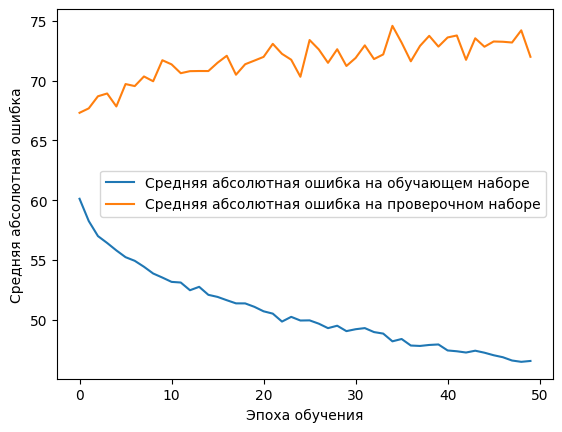

In [112]:
# Обучаем модель полученными данными
model = Sequential()
model.add(BatchNormalization(input_shape=(12,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae'])

history = model.fit(xTrain,
                    yTrain,
                    epochs=50,
                    batch_size=16,
                    validation_split=0.2,
                    verbose=2)

plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()